In [40]:
# setup and imports

import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_io import load_excel_data, clean_observations, get_annual_summary, calculate_shannon_diversity

# set some plotting defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [41]:
data = load_excel_data('../data/raw/Observations 2012-2025.xlsx')
df_obs = data['observations']
df_species = data['species']
df_gps = data['gps']
# Import additional libraries needed for analysis
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm

# Clean the observations data
df_clean = clean_observations(df_obs)

# Filter data for years 2015-2024
df_filtered = df_clean[(df_clean['year'] >= 2015) & (df_clean['year'] <= 2024)].copy()

print(f"Filtered data for years 2015-2024: {len(df_filtered)} observations")
print(f"Year range: {df_filtered['year'].min()} - {df_filtered['year'].max()}")
print(f"Unique species: {df_filtered['species_name'].nunique()}")
print(f"Unique years: {sorted(df_filtered['year'].unique())}")

Loading data from ../data/raw/Observations 2012-2025.xlsx
Loaded 86 species
Loaded 651 GPS points
Converting count columns to numeric
Loaded 114497 observation records
Data Cleaning
Starting with 114497 records
⚠ Found 5 negative wind values - setting to NaN
Removed 4 records with zero/negative counts
Final dataset: 114493 records
  Years: 2014 - 2025
  Unique species: 102
  Unique transects: 72
  Unique observers: 42
Filtered data for years 2015-2024: 99344 observations
Year range: 2015 - 2024
Unique species: 98
Unique years: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


In [42]:
# Indicator 1: Species Richness
# Calculate the number of unique species observed per year

annual_richness = []

for year in sorted(df_filtered['year'].unique()):
    df_year = df_filtered[df_filtered['year'] == year]
    
    # Species richness = number of unique species in the year
    richness = df_year['species_name'].nunique()
    
    annual_richness.append({
        'year': year,
        'species_richness': richness
    })

# Create DataFrame with annual richness values
df_richness = pd.DataFrame(annual_richness)
df_richness = df_richness.sort_values('year').reset_index(drop=True)

print("Annual Species Richness (2015-2024):")
print(df_richness.to_string(index=False))
print(f"\nMean richness: {df_richness['species_richness'].mean():.1f}")
print(f"Range: {df_richness['species_richness'].min()} - {df_richness['species_richness'].max()}")

Annual Species Richness (2015-2024):
 year  species_richness
 2015                70
 2016                77
 2017                71
 2018                73
 2019                70
 2020                68
 2021                69
 2022                68
 2023                67
 2024                70

Mean richness: 70.3
Range: 67 - 77


In [43]:
# Indicator 2: Shannon Diversity
# Calculate Shannon diversity index per year
# H' = -Σ(p_i * ln(p_i)), where p_i = proportion of individuals per species

annual_shannon = []

for year in sorted(df_filtered['year'].unique()):
    df_year = df_filtered[df_filtered['year'] == year]
    
    # Calculate Shannon diversity using the imported function
    shannon = calculate_shannon_diversity(df_year)
    
    annual_shannon.append({
        'year': year,
        'shannon_diversity': shannon
    })

# Create DataFrame with annual Shannon diversity values
df_shannon = pd.DataFrame(annual_shannon)
df_shannon = df_shannon.sort_values('year').reset_index(drop=True)

print("Annual Shannon Diversity (2015-2024):")
print(df_shannon.to_string(index=False))
print(f"\nMean Shannon diversity: {df_shannon['shannon_diversity'].mean():.3f}")
print(f"Range: {df_shannon['shannon_diversity'].min():.3f} - {df_shannon['shannon_diversity'].max():.3f}")


Annual Shannon Diversity (2015-2024):
 year  shannon_diversity
 2015           3.062091
 2016           3.053396
 2017           3.020512
 2018           2.999394
 2019           3.014705
 2020           3.043480
 2021           3.045896
 2022           3.036786
 2023           3.057674
 2024           3.043292

Mean Shannon diversity: 3.038
Range: 2.999 - 3.062


In [44]:
# Indicator 3: Total Abundance
# Calculate the total number of individuals observed per year

annual_abundance = []

for year in sorted(df_filtered['year'].unique()):
    df_year = df_filtered[df_filtered['year'] == year]
    
    # Total abundance = sum of all individual counts in the year
    total_abundance = df_year['individual_count'].sum()
    
    annual_abundance.append({
        'year': year,
        'total_abundance': total_abundance
    })

# Create DataFrame with annual total abundance values
df_abundance = pd.DataFrame(annual_abundance)
df_abundance = df_abundance.sort_values('year').reset_index(drop=True)

print("Annual Total Abundance (2015-2024):")
print(df_abundance.to_string(index=False))
print(f"\nMean total abundance: {df_abundance['total_abundance'].mean():,.0f}")
print(f"Range: {df_abundance['total_abundance'].min():,.0f} - {df_abundance['total_abundance'].max():,.0f}")

Annual Total Abundance (2015-2024):
 year  total_abundance
 2015     52453.000000
 2016     69062.000000
 2017     61685.380952
 2018     61208.000000
 2019     63217.000000
 2020     66171.000000
 2021     72048.000000
 2022     73549.000000
 2023     67057.000000
 2024     65395.000000

Mean total abundance: 65,185
Range: 52,453 - 73,549


In [45]:
# Indicator 4: Spatial Coverage
# Calculate the number of unique transects surveyed per year

annual_spatial = []

for year in sorted(df_filtered['year'].unique()):
    df_year = df_filtered[df_filtered['year'] == year]
    
    # Spatial coverage = number of unique transects surveyed in the year
    transects_surveyed = df_year['transect_name'].nunique()
    
    annual_spatial.append({
        'year': year,
        'transects_surveyed': transects_surveyed
    })

# Create DataFrame with annual spatial coverage values
df_spatial = pd.DataFrame(annual_spatial)
df_spatial = df_spatial.sort_values('year').reset_index(drop=True)

# Calculate spatial coverage as percentage of total transects
total_transects_overall = df_clean['transect_name'].nunique()
df_spatial['spatial_coverage_pct'] = (df_spatial['transects_surveyed'] / total_transects_overall * 100)

print("Annual Spatial Coverage (2015-2024):")
print(df_spatial[['year', 'transects_surveyed', 'spatial_coverage_pct']].to_string(index=False))
print(f"\nTotal transects in dataset: {total_transects_overall}")
print(f"Mean transects surveyed: {df_spatial['transects_surveyed'].mean():.1f}")
print(f"Mean spatial coverage: {df_spatial['spatial_coverage_pct'].mean():.1f}%")
print(f"Range: {df_spatial['transects_surveyed'].min()} - {df_spatial['transects_surveyed'].max()} transects")

Annual Spatial Coverage (2015-2024):
 year  transects_surveyed  spatial_coverage_pct
 2015                  53             73.611111
 2016                  59             81.944444
 2017                  60             83.333333
 2018                  65             90.277778
 2019                  64             88.888889
 2020                  63             87.500000
 2021                  63             87.500000
 2022                  63             87.500000
 2023                  64             88.888889
 2024                  65             90.277778

Total transects in dataset: 72
Mean transects surveyed: 61.9
Mean spatial coverage: 86.0%
Range: 53 - 65 transects


MODEL DIAGNOSTICS: Fitting Linear Regression Models


Species Richness - Linear Trend Model
------------------------------------------------------------
R-squared: 0.390
Adj. R-squared: 0.314
Slope: -0.6000
P-value (slope): 0.0535


Shannon Diversity - Linear Trend Model
------------------------------------------------------------
R-squared: 0.010
Adj. R-squared: -0.114
Slope: 0.0007
P-value (slope): 0.7826


Total Abundance - Linear Trend Model
------------------------------------------------------------
R-squared: 0.357
Adj. R-squared: 0.276
Slope: 1195.3642
P-value (slope): 0.0684


Spatial Coverage - Linear Trend Model
------------------------------------------------------------
R-squared: 0.562
Adj. R-squared: 0.507
Slope: 0.9152
P-value (slope): 0.0125



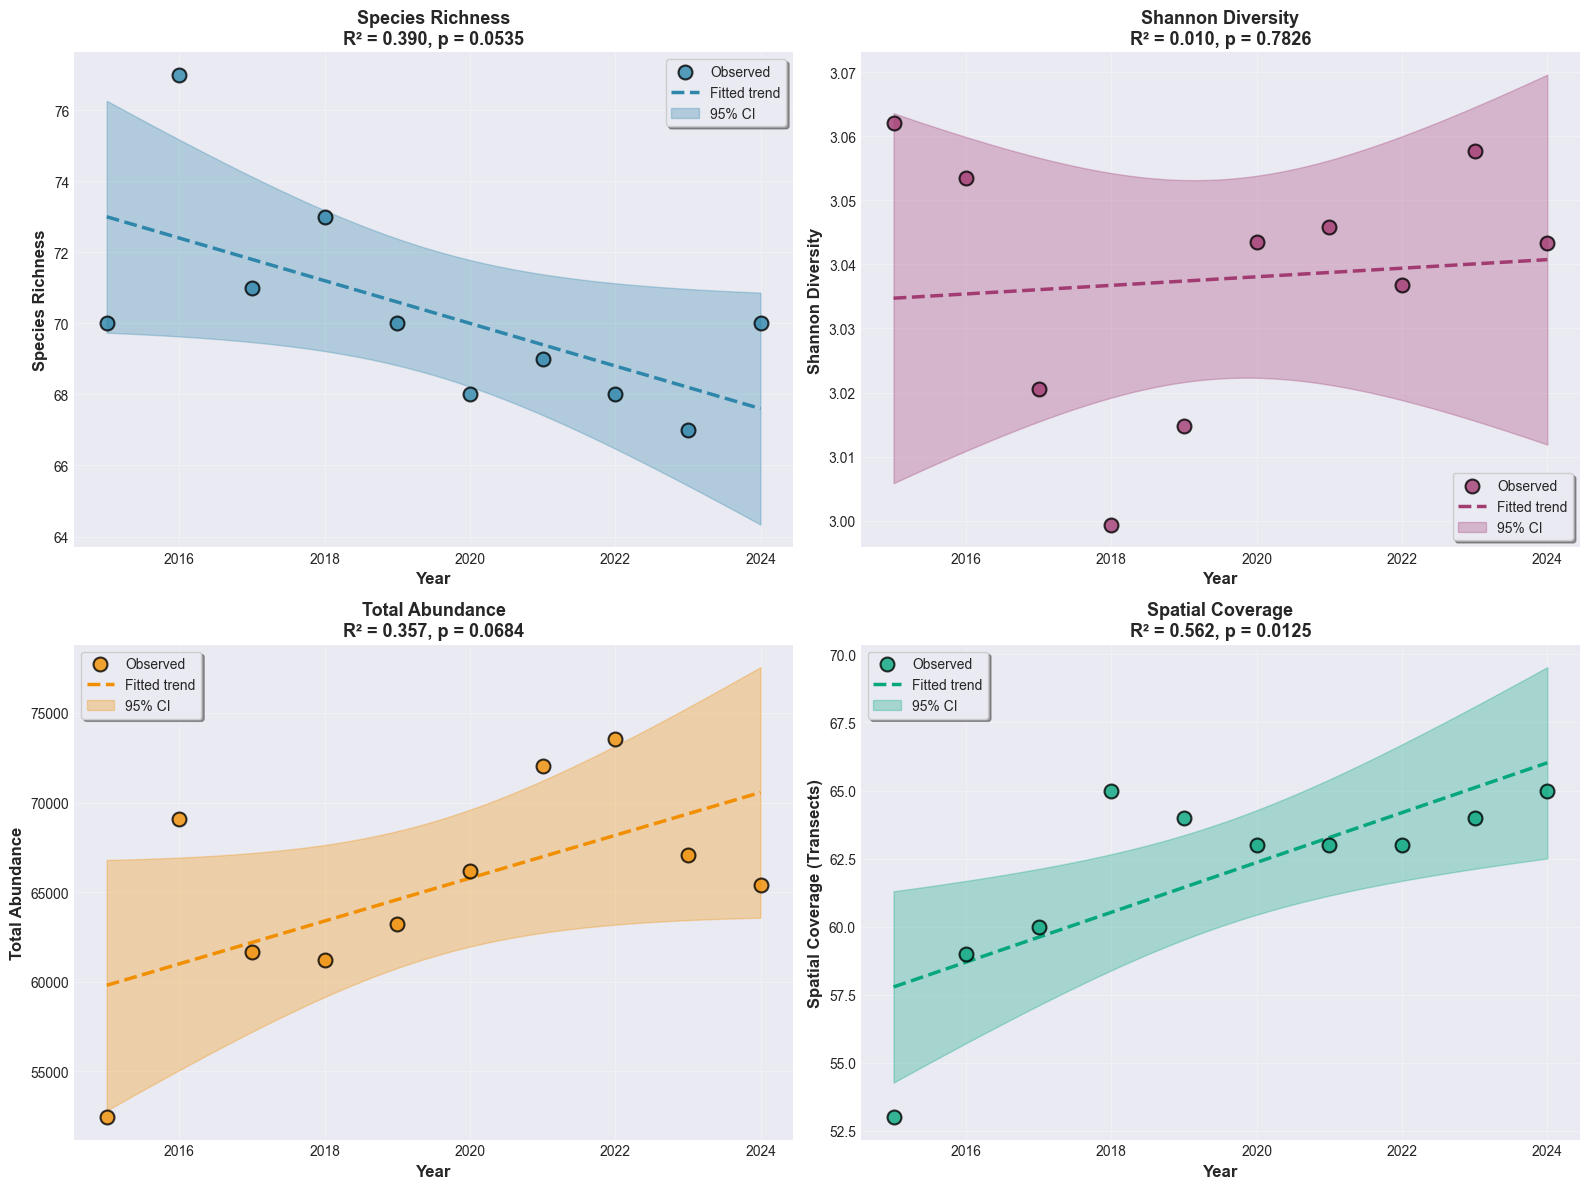


✓ Saved confidence interval plots: ../figures/indicator_model_diagnostics.png

Q-Q PLOTS FOR MODEL RESIDUALS



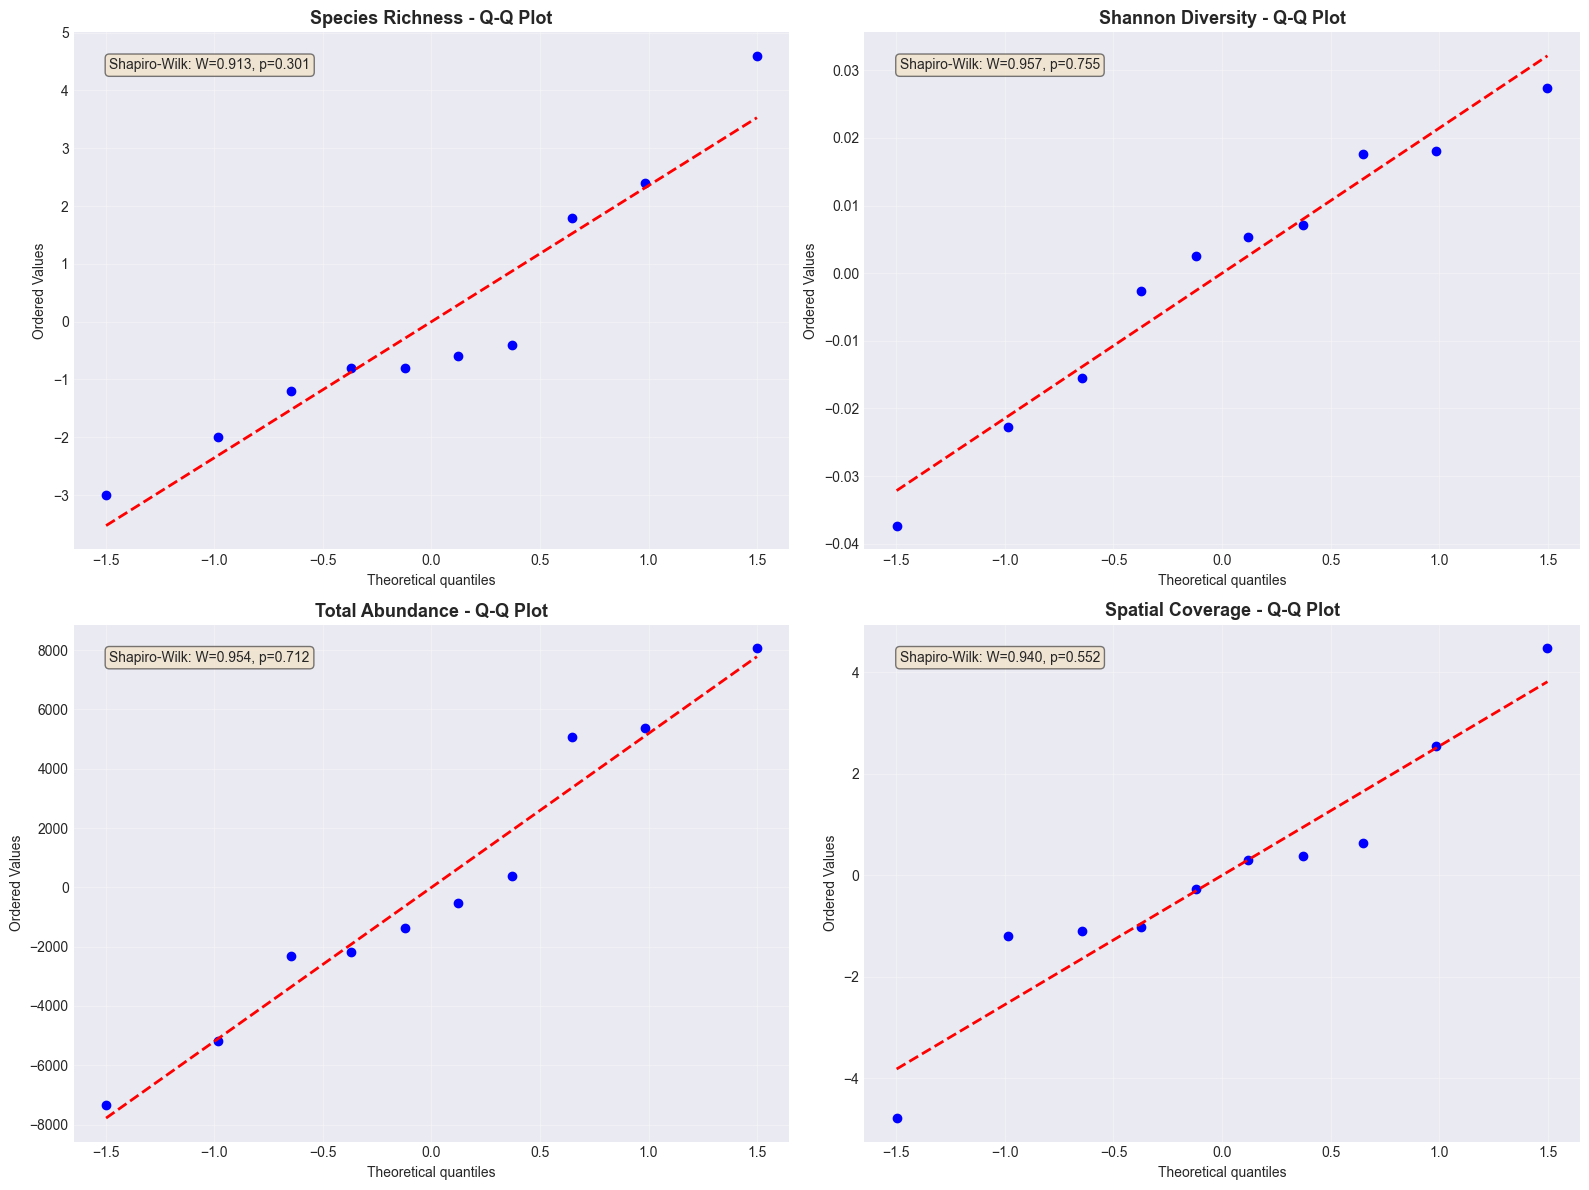


✓ Saved Q-Q plots: ../figures/indicator_model_qq_plots.png

MODEL DIAGNOSTICS SUMMARY


Species Richness:
  R² = 0.390, Adj. R² = 0.314
  Slope = -0.6000, p = 0.0535
  Residuals: mean = 0.0000, std = 2.1541
  Shapiro-Wilk: W = 0.913, p = 0.301
  ✓ Residuals appear normally distributed (p >= 0.05)

Shannon Diversity:
  R² = 0.010, Adj. R² = -0.114
  Slope = 0.0007, p = 0.7826
  Residuals: mean = -0.0000, std = 0.0190
  Shapiro-Wilk: W = 0.957, p = 0.755
  ✓ Residuals appear normally distributed (p >= 0.05)

Total Abundance:
  R² = 0.357, Adj. R² = 0.276
  Slope = 1195.3642, p = 0.0684
  Residuals: mean = 0.0000, std = 4612.6554
  Shapiro-Wilk: W = 0.954, p = 0.712
  ✓ Residuals appear normally distributed (p >= 0.05)

Spatial Coverage:
  R² = 0.562, Adj. R² = 0.507
  Slope = 0.9152, p = 0.0125
  Residuals: mean = 0.0000, std = 2.3196
  Shapiro-Wilk: W = 0.940, p = 0.552
  ✓ Residuals appear normally distributed (p >= 0.05)



In [ ]:
# Model Diagnostics
# Create confidence interval graphs and Q-Q plots for all indicators

# Define indicators to analyze
indicators = {
    'Species Richness': {
        'data': df_richness,
        'value_col': 'species_richness',
        'ylabel': 'Species Richness',
        'color': '#2E86AB'
    },
    'Shannon Diversity': {
        'data': df_shannon,
        'value_col': 'shannon_diversity',
        'ylabel': 'Shannon Diversity',
        'color': '#A23B72'
    },
    'Total Abundance': {
        'data': df_abundance,
        'value_col': 'total_abundance',
        'ylabel': 'Total Abundance',
        'color': '#F18F01'
    },
    'Spatial Coverage': {
        'data': df_spatial,
        'value_col': 'transects_surveyed',
        'ylabel': 'Spatial Coverage (Transects)',
        'color': '#06A77D'
    }
}

# Store model results for diagnostics
model_results = {}

print("=" * 80)
print("MODEL DIAGNOSTICS: Fitting Linear Regression Models")
print("=" * 80)
print()

# Fit models and create confidence interval plots
fig_ci, axes_ci = plt.subplots(2, 2, figsize=(16, 12))
axes_ci = axes_ci.flatten()

for idx, (indicator_name, indicator_info) in enumerate(indicators.items()):
    df_ind = indicator_info['data'].copy()
    value_col = indicator_info['value_col']
    ylabel = indicator_info['ylabel']
    color = indicator_info['color']
    
    # Prepare data
    years = df_ind['year'].values
    values = df_ind[value_col].values
    
    # Center years for better numerical stability
    year_mean = years.mean()
    years_centered = years - year_mean
    
    # Fit linear regression model
    X = sm.add_constant(years_centered)
    y = values
    model = sm.OLS(y, X).fit()
    
    # Store model results
    model_results[indicator_name] = {
        'model': model,
        'years': years,
        'years_centered': years_centered,
        'values': values,
        'fitted': model.fittedvalues,
        'residuals': model.resid,
        'color': color,
        'ylabel': ylabel
    }
    
    # Print model summary
    print(f"\n{indicator_name} - Linear Trend Model")
    print("-" * 60)
    print(f"R-squared: {model.rsquared:.3f}")
    print(f"Adj. R-squared: {model.rsquared_adj:.3f}")
    print(f"Slope: {model.params[1]:.4f}")
    print(f"P-value (slope): {model.pvalues[1]:.4f}")
    print()
    
    # Generate predictions with confidence intervals
    # Create a range of years for smooth prediction line
    years_pred = np.linspace(years.min(), years.max(), 100)
    years_pred_centered = years_pred - year_mean
    X_pred = sm.add_constant(years_pred_centered)
    
    # Get predictions and confidence intervals
    pred = model.get_prediction(X_pred)
    pred_summary = pred.summary_frame(alpha=0.05)
    
    # Plot confidence intervals
    ax = axes_ci[idx]
    
    # Plot data points
    ax.scatter(years, values, s=100, alpha=0.8, color=color, 
               edgecolors='black', linewidth=1.5, zorder=3, label='Observed')
    
    # Plot fitted line
    ax.plot(years_pred, pred_summary['mean'], '--', 
           color=color, linewidth=2.5, label='Fitted trend', zorder=2)
    
    # Plot confidence interval
    ax.fill_between(years_pred, pred_summary['mean_ci_lower'], 
                    pred_summary['mean_ci_upper'],
                    alpha=0.3, color=color, label='95% CI', zorder=1)
    
    # Styling
    ax.set_xlabel('Year', fontweight='bold', fontsize=12)
    ax.set_ylabel(ylabel, fontweight='bold', fontsize=12)
    ax.set_title(f'{indicator_name}\nR² = {model.rsquared:.3f}, p = {model.pvalues[1]:.4f}', 
                fontweight='bold', fontsize=13)
    ax.legend(frameon=True, loc='best', shadow=True)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/indicator_model_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved confidence interval plots: ../figures/indicator_model_diagnostics.png")

# Create Q-Q plots for all indicators
print("\n" + "=" * 80)
print("Q-Q PLOTS FOR MODEL RESIDUALS")
print("=" * 80)
print()

fig_qq, axes_qq = plt.subplots(2, 2, figsize=(16, 12))
axes_qq = axes_qq.flatten()

for idx, (indicator_name, indicator_info) in enumerate(indicators.items()):
    result = model_results[indicator_name]
    residuals = result['residuals']
    color = result['color']
    
    # Create Q-Q plot
    ax = axes_qq[idx]
    stats.probplot(residuals, dist="norm", plot=ax)
    
    # Styling
    ax.set_title(f'{indicator_name} - Q-Q Plot', fontweight='bold', fontsize=13)
    ax.grid(True, alpha=0.3)
    
    # Add reference line styling
    line = ax.get_lines()[1]  # Get the reference line
    line.set_color('red')
    line.set_linestyle('--')
    line.set_linewidth(2)
    
    # Add Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    ax.text(0.05, 0.95, f'Shapiro-Wilk: W={shapiro_stat:.3f}, p={shapiro_p:.3f}',
           transform=ax.transAxes, fontsize=10, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figures/indicator_model_qq_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved Q-Q plots: ../figures/indicator_model_qq_plots.png")



SYNTHESIS & COMPARISON OF INDICATORS

Combined Indicators DataFrame:
 year  Richness  Shannon  Total_Abundance  Spatial_Coverage
 2015        70 3.062091     52453.000000                53
 2016        77 3.053396     69062.000000                59
 2017        71 3.020512     61685.380952                60
 2018        73 2.999394     61208.000000                65
 2019        70 3.014705     63217.000000                64
 2020        68 3.043480     66171.000000                63
 2021        69 3.045896     72048.000000                63
 2022        68 3.036786     73549.000000                63
 2023        67 3.057674     67057.000000                64
 2024        70 3.043292     65395.000000                65


CORRELATION MATRIX
                  Richness  Shannon  Total_Abundance  Spatial_Coverage
Richness             1.000   -0.190           -0.123            -0.255
Shannon             -0.190    1.000            0.092            -0.482
Total_Abundance     -0.123    0.092 

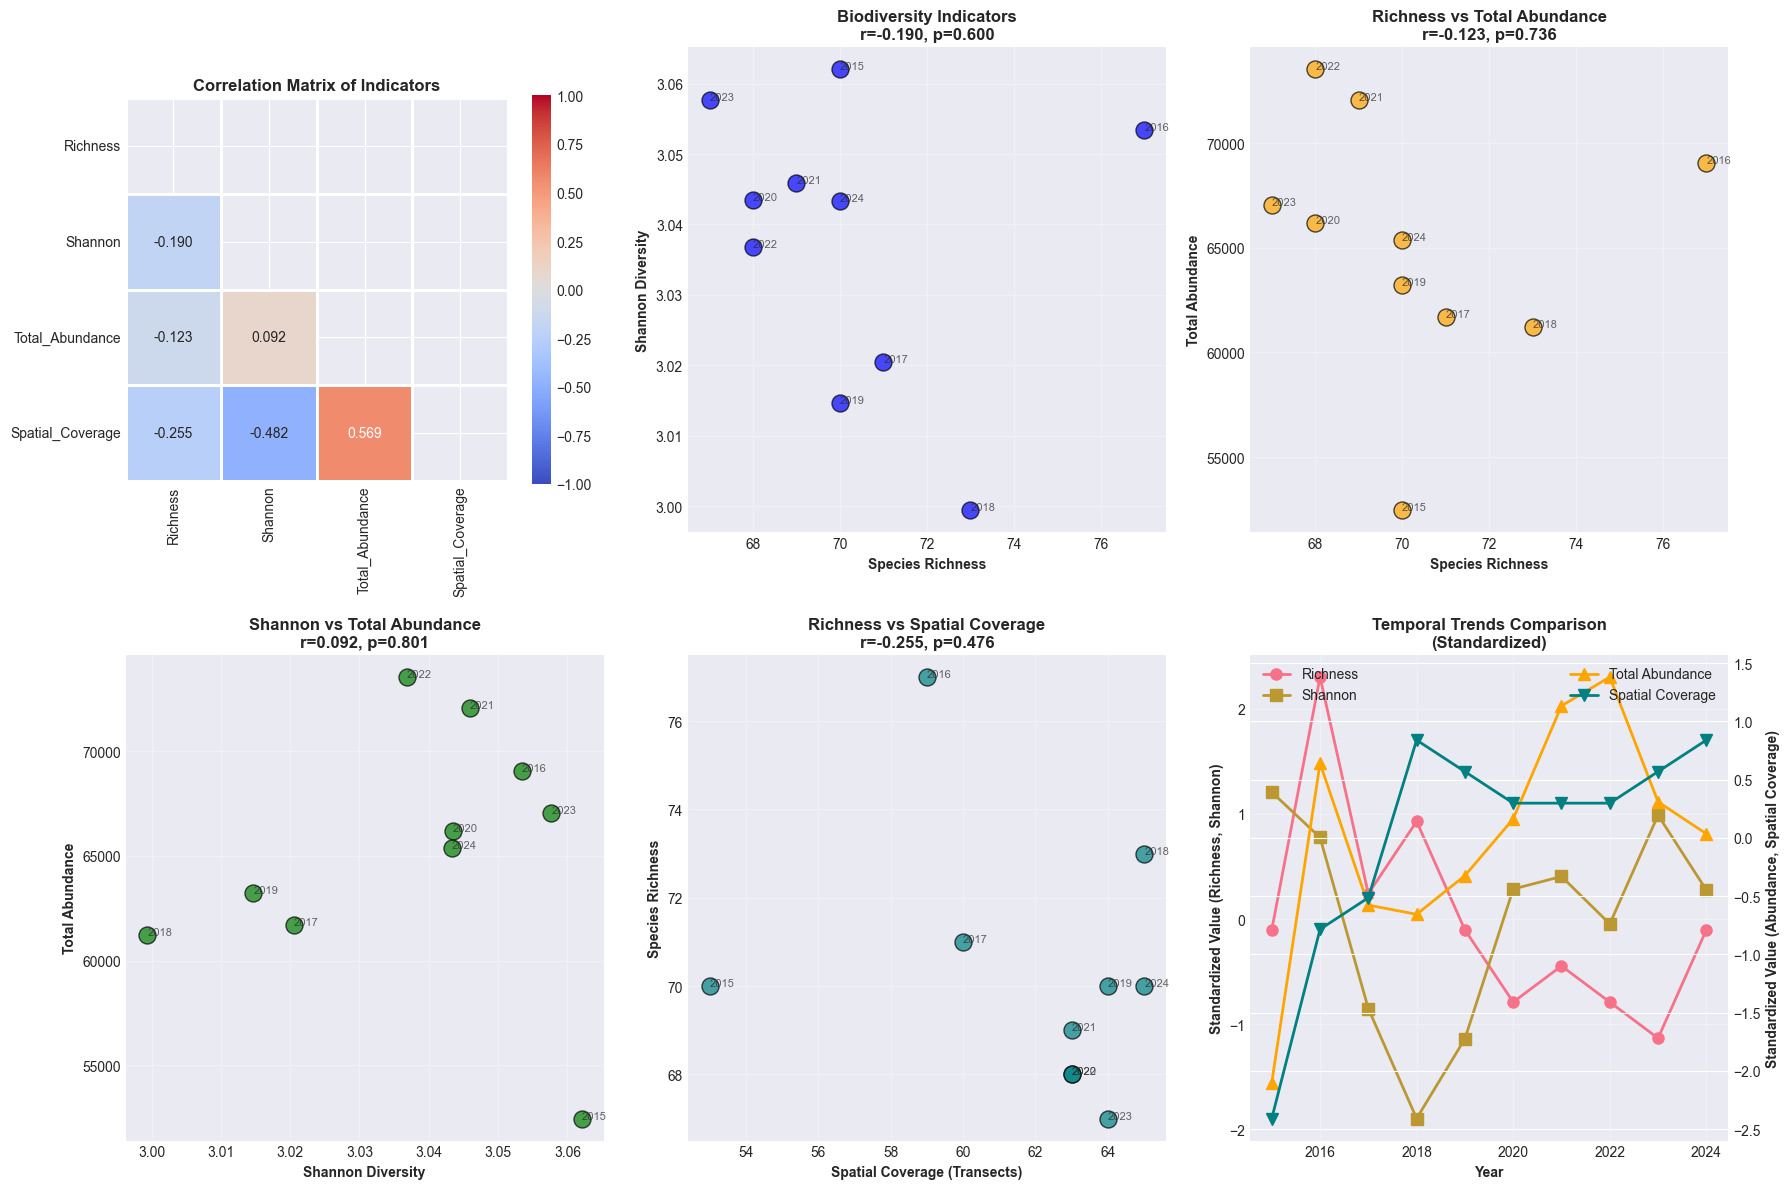


✓ Saved synthesis plots: ../figures/indicator_synthesis_comparison.png

INTERPRETATION & SYNTHESIS


KEY RELATIONSHIPS IDENTIFIED:

1. BIODIVERSITY INDICATORS (Richness vs Shannon):
   • These measure different aspects of diversity
   • Richness: number of species (count)
   • Shannon: species evenness and richness combined
   • Relationship indicates whether diversity is driven by species number or evenness
   • Negative correlation suggests trade-offs between species number and evenness

2. ABUNDANCE VS BIODIVERSITY:
   • Total abundance may increase with richness (more species = more individuals)
   • However, high abundance can also occur with low richness (dominance by few species)
   • Strong correlation with Shannon suggests abundance affects diversity metrics

3. SAMPLING EFFECTS:
   • Spatial coverage may influence observed richness
   • More coverage = more opportunities to detect rare species
   • Need to distinguish true ecological changes from sampling artifacts
   • Spat

In [47]:
# Synthesis & Comparison
# Relate indicators to each other and examine relationships

print("\n" + "=" * 80)
print("SYNTHESIS & COMPARISON OF INDICATORS")
print("=" * 80)
print()

# Merge all indicators into a single DataFrame
df_synthesis = df_richness[['year', 'species_richness']].copy()
df_synthesis = df_synthesis.merge(df_shannon[['year', 'shannon_diversity']], on='year', how='inner')
df_synthesis = df_synthesis.merge(df_abundance[['year', 'total_abundance']], on='year', how='inner')
df_synthesis = df_synthesis.merge(df_spatial[['year', 'transects_surveyed']], on='year', how='inner')

# Rename columns for clarity
df_synthesis.columns = ['year', 'Richness', 'Shannon', 'Total_Abundance', 'Spatial_Coverage']

print("Combined Indicators DataFrame:")
print(df_synthesis.to_string(index=False))
print()

# Calculate correlation matrix
correlation_matrix = df_synthesis[['Richness', 'Shannon', 'Total_Abundance', 'Spatial_Coverage']].corr()

print("\n" + "=" * 80)
print("CORRELATION MATRIX")
print("=" * 80)
print(correlation_matrix.round(3))
print()

# Calculate Pearson correlation coefficients and p-values
from scipy.stats import pearsonr

print("=" * 80)
print("DETAILED CORRELATION ANALYSIS")
print("=" * 80)
print()

# Key relationships to examine
key_relationships = [
    ('Richness', 'Shannon', 'Biodiversity indicators'),
    ('Richness', 'Total_Abundance', 'Richness vs Total Abundance'),
    ('Shannon', 'Total_Abundance', 'Shannon vs Total Abundance'),
    ('Total_Abundance', 'Spatial_Coverage', 'Abundance vs Spatial Coverage'),
    ('Richness', 'Spatial_Coverage', 'Richness vs Spatial Coverage'),
    ('Shannon', 'Spatial_Coverage', 'Shannon vs Spatial Coverage'),
]

correlations = {}
for var1, var2, label in key_relationships:
    r, p = pearsonr(df_synthesis[var1], df_synthesis[var2])
    correlations[f"{var1}-{var2}"] = {'r': r, 'p': p, 'label': label}
    significance = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
    print(f"{label:40s}: r = {r:6.3f}, p = {p:.4f} {significance}")

print("\n" + "=" * 80)
print("VISUALIZATIONS")
print("=" * 80)

# Create comprehensive visualization figure
fig = plt.figure(figsize=(18, 12))

# 1. Correlation Heatmap
ax1 = plt.subplot(2, 3, 1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1, ax=ax1)
ax1.set_title('Correlation Matrix of Indicators', fontweight='bold', fontsize=12)

# 2. Biodiversity Indicators (Richness vs Shannon)
ax2 = plt.subplot(2, 3, 2)
ax2.scatter(df_synthesis['Richness'], df_synthesis['Shannon'], 
            s=150, alpha=0.7, edgecolors='black', color='blue')
for idx, row in df_synthesis.iterrows():
    ax2.annotate(int(row['year']), (row['Richness'], row['Shannon']), 
                fontsize=8, alpha=0.7)
r, p = pearsonr(df_synthesis['Richness'], df_synthesis['Shannon'])
ax2.set_xlabel('Species Richness', fontweight='bold')
ax2.set_ylabel('Shannon Diversity', fontweight='bold')
ax2.set_title(f'Biodiversity Indicators\nr={r:.3f}, p={p:.3f}', fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Richness vs Total Abundance
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(df_synthesis['Richness'], df_synthesis['Total_Abundance'], 
            s=150, alpha=0.7, edgecolors='black', color='orange')
for idx, row in df_synthesis.iterrows():
    ax3.annotate(int(row['year']), (row['Richness'], row['Total_Abundance']), 
                fontsize=8, alpha=0.7)
r, p = pearsonr(df_synthesis['Richness'], df_synthesis['Total_Abundance'])
ax3.set_xlabel('Species Richness', fontweight='bold')
ax3.set_ylabel('Total Abundance', fontweight='bold')
ax3.set_title(f'Richness vs Total Abundance\nr={r:.3f}, p={p:.3f}', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Shannon vs Total Abundance
ax4 = plt.subplot(2, 3, 4)
ax4.scatter(df_synthesis['Shannon'], df_synthesis['Total_Abundance'], 
            s=150, alpha=0.7, edgecolors='black', color='green')
for idx, row in df_synthesis.iterrows():
    ax4.annotate(int(row['year']), (row['Shannon'], row['Total_Abundance']), 
                fontsize=8, alpha=0.7)
r, p = pearsonr(df_synthesis['Shannon'], df_synthesis['Total_Abundance'])
ax4.set_xlabel('Shannon Diversity', fontweight='bold')
ax4.set_ylabel('Total Abundance', fontweight='bold')
ax4.set_title(f'Shannon vs Total Abundance\nr={r:.3f}, p={p:.3f}', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Spatial Coverage vs Richness
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(df_synthesis['Spatial_Coverage'], df_synthesis['Richness'], 
            s=150, alpha=0.7, edgecolors='black', color='teal')
for idx, row in df_synthesis.iterrows():
    ax5.annotate(int(row['year']), (row['Spatial_Coverage'], row['Richness']), 
                fontsize=8, alpha=0.7)
r, p = pearsonr(df_synthesis['Spatial_Coverage'], df_synthesis['Richness'])
ax5.set_xlabel('Spatial Coverage (Transects)', fontweight='bold')
ax5.set_ylabel('Species Richness', fontweight='bold')
ax5.set_title(f'Richness vs Spatial Coverage\nr={r:.3f}, p={p:.3f}', fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Temporal trends overlay
ax6 = plt.subplot(2, 3, 6)
years = df_synthesis['year'].values
ax6_twin = ax6.twinx()

# Normalize indicators for comparison (z-score)
indicators_normalized = df_synthesis[['Richness', 'Shannon', 'Total_Abundance', 'Spatial_Coverage']].copy()
for col in indicators_normalized.columns:
    indicators_normalized[col] = (indicators_normalized[col] - indicators_normalized[col].mean()) / indicators_normalized[col].std()
indicators_normalized = indicators_normalized.values

ax6.plot(years, indicators_normalized[:, 0], 'o-', label='Richness', linewidth=2, markersize=8)
ax6.plot(years, indicators_normalized[:, 1], 's-', label='Shannon', linewidth=2, markersize=8)
ax6_twin.plot(years, indicators_normalized[:, 2], '^-', label='Total Abundance', 
              linewidth=2, markersize=8, color='orange')
ax6_twin.plot(years, indicators_normalized[:, 3], 'v-', label='Spatial Coverage', 
              linewidth=2, markersize=8, color='teal')

ax6.set_xlabel('Year', fontweight='bold')
ax6.set_ylabel('Standardized Value (Richness, Shannon)', fontweight='bold')
ax6_twin.set_ylabel('Standardized Value (Abundance, Spatial Coverage)', fontweight='bold')
ax6.set_title('Temporal Trends Comparison\n(Standardized)', fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend(loc='upper left')
ax6_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../figures/indicator_synthesis_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved synthesis plots: ../figures/indicator_synthesis_comparison.png")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION & SYNTHESIS")
print("=" * 80)
print()

interpretation = """
KEY RELATIONSHIPS IDENTIFIED:

1. BIODIVERSITY INDICATORS (Richness vs Shannon):
   • These measure different aspects of diversity
   • Richness: number of species (count)
   • Shannon: species evenness and richness combined
   • Relationship indicates whether diversity is driven by species number or evenness
   • Negative correlation suggests trade-offs between species number and evenness

2. ABUNDANCE VS BIODIVERSITY:
   • Total abundance may increase with richness (more species = more individuals)
   • However, high abundance can also occur with low richness (dominance by few species)
   • Strong correlation with Shannon suggests abundance affects diversity metrics

3. SAMPLING EFFECTS:
   • Spatial coverage may influence observed richness
   • More coverage = more opportunities to detect rare species
   • Need to distinguish true ecological changes from sampling artifacts
   • Spatial coverage affects representativeness of surveys

4. TEMPORAL PATTERNS:
   • Total abundance reflects overall population trends
   • Spatial coverage affects representativeness of surveys



ECOLOGICAL INTERPRETATION:
• If richness increases but Shannon decreases → dominance by fewer species
• If abundance increases but richness stable → population growth in common species
• If all metrics increase together → overall community enhancement
• If metrics diverge → community restructuring or methodological issues
• Weak correlation between richness and spatial coverage → true ecological signal
• Strong correlation suggests spatial sampling effects

METHODOLOGICAL CONSIDERATIONS:
• Spatial coverage affects species detection probability
• Total abundance reflects overall population trends
• Spatial coverage affects representativeness of surveys
• Temporal patterns reveal ecological dynamics vs. methodological artifacts
"""

print(interpretation)
